In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
df=pd.read_csv('/content/drive/MyDrive/Innomatics internship/scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [73]:
df.shape

(149, 3)

In [74]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [75]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [77]:
df['Score'] = df['Score'].apply(lambda x: (int(x.split(' / ')[0]) / int(x.split(' / ')[1])) * 100)
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,85.714286
1,AI_ELITE_7,uid_148,85.714286
2,AI_ELITE_7,uid_147,100.000000
3,AI_ELITE_7,uid_146,100.000000
4,AI_ELITE_7,uid_145,57.142857


In [78]:
df['Score'] = df['Score'].round(2)
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,85.71
1,AI_ELITE_7,uid_148,85.71
2,AI_ELITE_7,uid_147,100.00
3,AI_ELITE_7,uid_146,100.00
4,AI_ELITE_7,uid_145,57.14


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batch    149 non-null    object 
 1   User_ID  149 non-null    object 
 2   Score    149 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


In [80]:
df['Batch'].value_counts()


,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


In [81]:
df.describe()

,Score
count,149.000000
mean,62.607315
std,22.745068
min,0.000000
25%,42.860000
50%,57.140000
75%,71.430000
max,100.000000


In [82]:
df.nunique()

,0
Batch,3
User_ID,149
Score,8


### **1. Univariate Analysis - Statistical Non Visual Analysis**

In [83]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64'])

In [84]:
numerical_df.head()

,Score
0,85.71
1,85.71
2,100.00
3,100.00
4,57.14


In [85]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [86]:
discrete_univariate_analysis(discrete_df)

********** Batch **********
count                                       149
nunique                                       3
unique     [AI_ELITE_7, AI_ELITE_6, AI_ELITE_4]
Name: Batch, dtype: object
Value Counts: 
 Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

********** User_ID **********
count                                                    149
nunique                                                  149
unique     [uid_149, uid_148, uid_147, uid_146, uid_145, ...
Name: User_ID, dtype: object
Value Counts: 
 User_ID
uid_149    1
uid_148    1
uid_147    1
uid_146    1
uid_145    1
          ..
uid_5      1
uid_4      1
uid_3      1
uid_2      1
uid_1      1
Name: count, Length: 149, dtype: int64



In [87]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std','skew','kurtosis']))
        print()

In [88]:
numerical_univariate_analysis(numerical_df)

********** Score **********
min           0.000000
max         100.000000
mean         62.607315
median       57.140000
std          22.745068
skew         -0.179692
kurtosis     -0.238679
Name: Score, dtype: float64



## **2. Univariate - Visual Analysis**

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

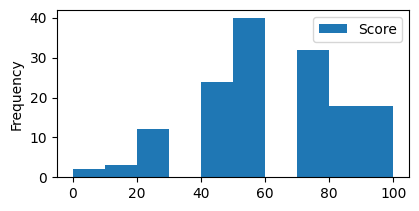

In [89]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

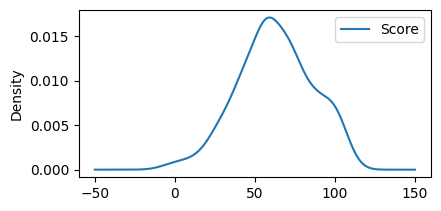

In [90]:
df.plot(kind='kde', subplots=True, layout=(4, 2), figsize=(10, 10))

,0
Score,"Axes(0.125,0.712609;0.352273x0.167391)"


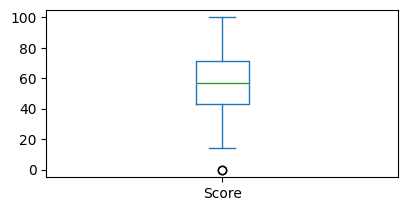

In [91]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

<Axes: xlabel='Batch'>

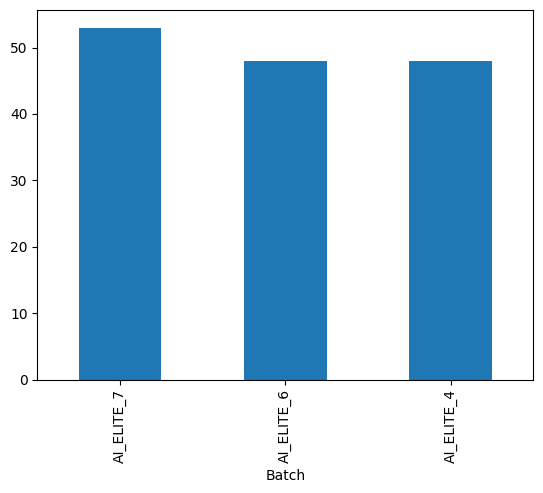

In [92]:
df['Batch'].value_counts().plot(kind='bar')

# **3. Bivariate Analysis**

In [93]:
stats_table = df.groupby('Batch')['Score'].describe()
print(stats_table)

            count       mean        std    min    25%    50%      75%    max
Batch                                                                       
AI_ELITE_4   48.0  54.166042  20.619371   0.00  42.86  57.14  60.7125  100.0
AI_ELITE_6   48.0  60.416667  23.434109   0.00  42.86  57.14  71.4300  100.0
AI_ELITE_7   53.0  72.236226  20.666143  28.57  57.14  71.43  85.7100  100.0


**Categorical data vs Numerical data**

<Axes: >

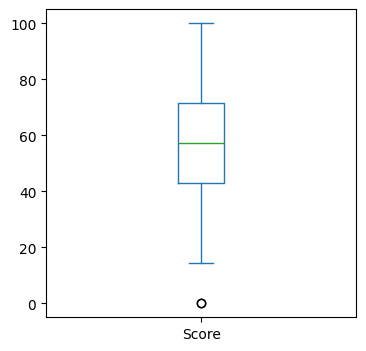

In [94]:
df.plot(kind='box', x='Batch', y='Score', figsize=(4, 4))

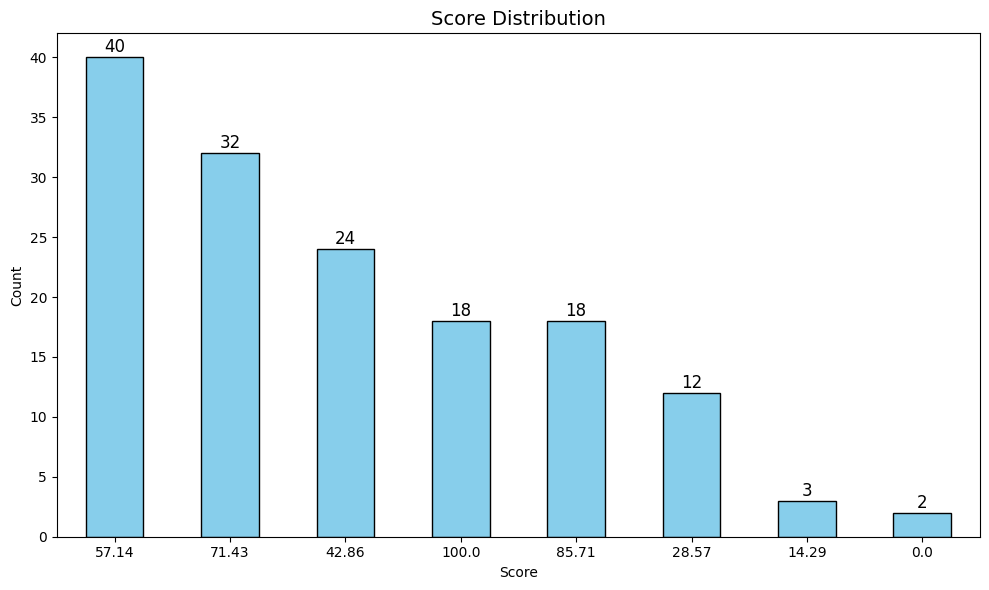

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'Score' column
# Example data if you don't have it:
# df = pd.DataFrame({'Score': ['A', 'B', 'A', 'C', 'B', 'B', 'A', 'C', 'A', 'B']})

# Get value counts
value_counts_series = df['Score'].value_counts()

# Plot
ax = value_counts_series.plot(kind='bar', figsize=(10, 6),
                              color='skyblue', edgecolor='black')

# Add value labels on top of bars
for i, v in enumerate(value_counts_series):
    ax.text(i, v + 0.1, str(v),  # Position and text
            ha='center', va='bottom', fontsize=12)

plt.title('Score Distribution', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

/tmp/ipython-input-2161154468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(x='Batch', y='Score', data=df,


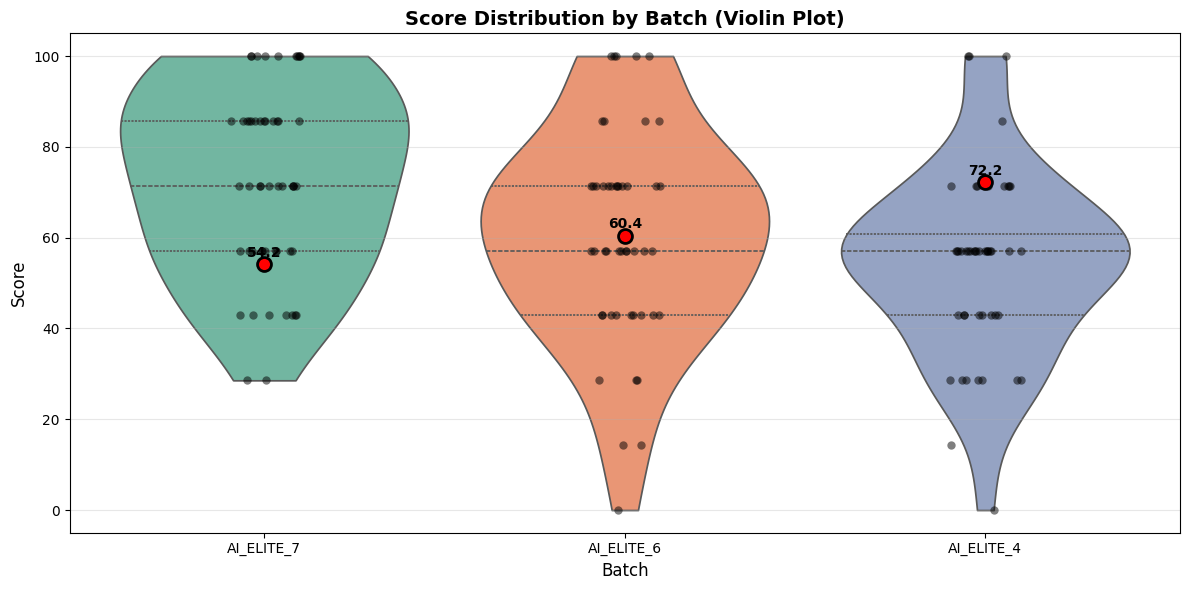

In [96]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create violin plot
violin = sns.violinplot(x='Batch', y='Score', data=df,
                        palette='Set2',
                        inner='quartile',  # Show quartiles inside
                        cut=0)  # Don't cut the tails

# Overlay individual points
sns.stripplot(x='Batch', y='Score', data=df,
              color='black', alpha=0.5, jitter=True, size=6)

# Add mean markers
means = df.groupby('Batch')['Score'].mean()
for i, (batch, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color='red', s=100, zorder=5,
                edgecolors='black', linewidth=2)
    plt.text(i, mean_val + 1, f'{mean_val:.1f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Score Distribution by Batch (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Batch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Findings**

1. There are 3 Batchs,149 Students.
2. AI_ELITE_7 batch has 53 students and AI_ELITE_6 and AI_ELITE_4 have 48 students each.
3. The score values are normally distributed ,that is evident from kde plot.
4. Most common percentage(score) is 57.14 and least common is 0.
5. 18 students got 100% scores
6. Maximum score in each Batch is 100%
7. Minimum score is  for 27.51% for AI_ELITE_7 and 0 for other two batches.
8. Average score is high in AI_ELITE_7 and low in AI_ELITE_4 batch
9. 7 students won 100% marks in AI_ELITE_7 batch and 5 in AI_ELITE_6 and 3 in AI_ELITE_4.
10. Number of students got 0% score is 0 in AI_ELITE_7 and 1 in other two batches



